# Credit Card Customer Segmentation

## Customer data
**Objective**: Develop customer segmentation to define marketing strategy. The data contains information of around 9,000 active credit card holders during the last six months. The data is taken from a Kaggle dataset.

**Data source**: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

The data includes the following features:
- CUSTID : Identification of Credit Card holder.
- BALANCE : Balance amount left in their account to make purchases
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account.
- ONEOFFPURCHASES : Maximum purchase amount done in one-go.
- INSTALLMENTSPURCHASES : Amount of purchase done in installment.
- CASHADVANCE : Cash in advance given by the user.
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased).
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid.
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced".
- PURCHASESTRX : Number of purchase transactions made.
- CREDITLIMIT : Limit of Credit Card for user.
- PAYMENTS : Amount of Payment done by user.
- MINIMUM_PAYMENTS : Minimum amount of payments made by user.
- PRCFULLPAYMENT : Percent of full payment paid by user.
- TENURE : Tenure of credit card service for user.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

sns.set_theme(style='white')

### Load data & get insights

In [2]:
raw_df = pd.read_csv('Data/CC GENERAL.csv')
df = raw_df.copy()
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
print(f'The shape of the dataset is {df.shape}')
print(f'The  data contains {df.nunique()[0]} customers')

The shape of the dataset is (8950, 18)
The  data contains 8950 customers


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**Note**: 
- The data cointas information of 8950 customers.
- All features are floats or integers, so no need for encoding the data.
- The are some missing avlues in MINIMUM_PAYMENTS and CREDIT_LIMIT we need to take care of.

#### Checking duplicates

In [5]:
print(f'Number of duplicated rows: {df.duplicated().sum()}')

Number of duplicated rows: 0


#### Exploring Nan Values

In [6]:
print(f'The data has {df.isnull().sum().sum()} nan values, ' \
      f'which accounts for {df.isnull().sum().sum() / len(df):.2%} of the data instances.')

The data has 314 nan values, which accounts for 3.51% of the data instances.


In [24]:
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
BALANCE                               0
BALANCE_FREQUENCY                     0
TENURE                                0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
Cluster                               0
dtype: int64

**Notes:** 
- Minimum payments is the only feature with some missing values, accounting for about 3.5% of the whole dataset.
- Credit limit has one single missing value.

We are going to use K-Nearest Neighbours imputation for the missing values. But first, lets do some EDA.

In [8]:
# Drop customer id column
df.drop('CUST_ID', axis=1, inplace=True)

## Explanatory Data Analysis % Data Preprocessing

### Correlation heatmap

Let's begin the analysis plotting a correlation heatmap:

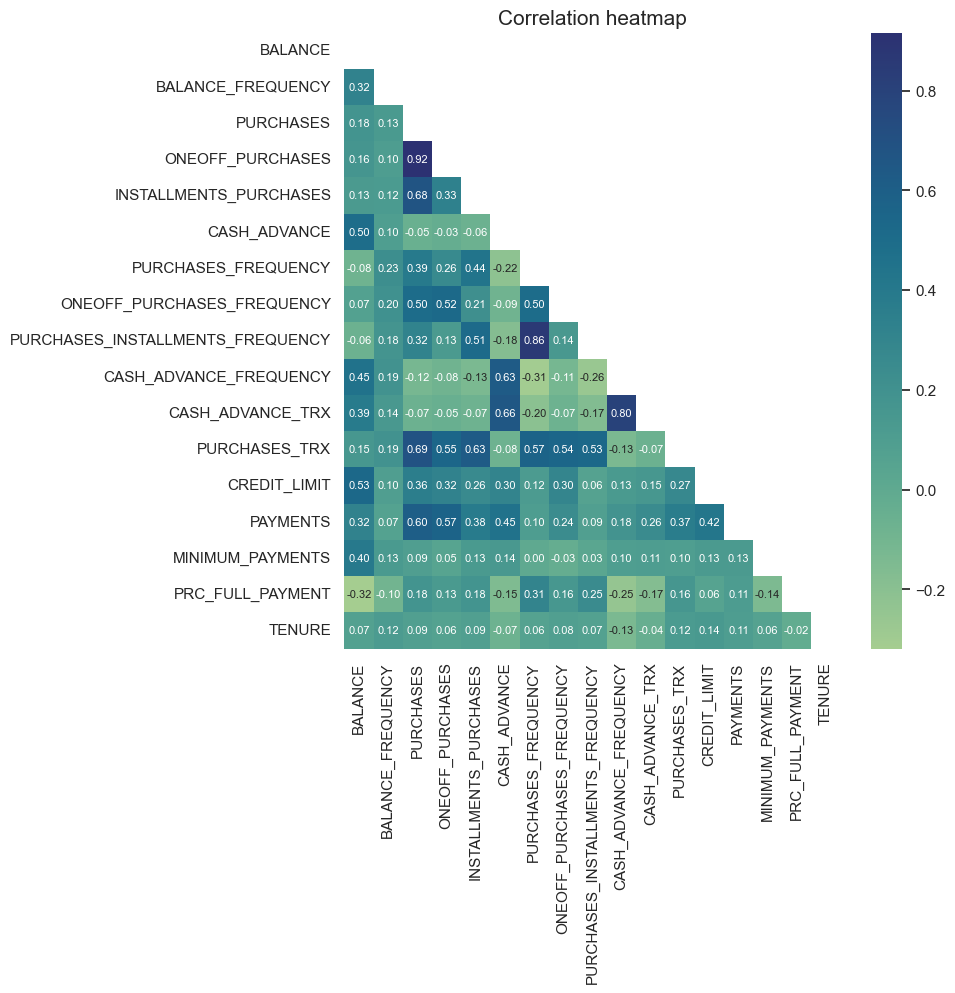

In [9]:
# Correlation heatmap
plt.figure(figsize=(8, 8))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='crest', annot=True, annot_kws={'size': 8}, fmt='.2f')
plt.title('Correlation heatmap', fontsize=15)
plt.show()

**Insights**:
- *There is very high correlation between one_off_purchases and purchases*. Customers who have made bigger one-go purchases have larger total purchases overall. 
-  *High correlation between purchases frequency and purchases installments frequency*. Customers with higher purchase frequency tend to also buy in installments more frequently.
- *High correlation between cash advance frequency and cash advance trx*. This makes total sence since customers who pay cash in advance more frequently, will most likely have a higher number of transactions made with cash in advance in the period analyzed.
- There are some other *relatively high correlations like purchases and purchases trx* and *purchases and installments purchases*, which also makes sense since the more transactions you make, probably the more money you'll end up spending.

Let's see the scatter plots from those correlated variables:

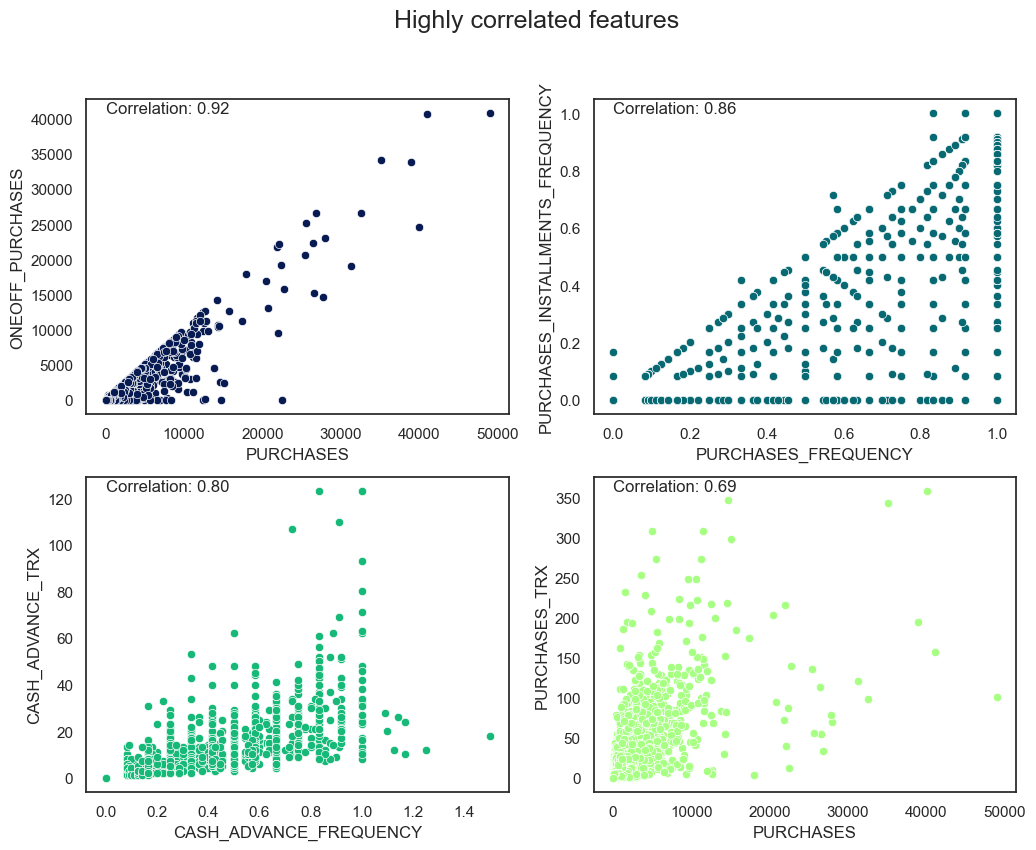

In [10]:
# Scatter plots of highly correlated features
fig, ax = plt.subplots(2, 2, figsize=(12, 9))
ax = ax.flatten()
feature1 = ['PURCHASES', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES']
feature2 = ['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']
color = ['#071A52', '#086972', '#17B978', '#A7FF83']
i=0
for f1, f2 in zip(feature1, feature2):
    # Correlation between both features
    corr = df[[f1, f2]].corr()
    # Scatter plot 
    sns.scatterplot(data=df, x=f1, y=f2, ax=ax[i], color=color[i])
    # Annotate the correlation score
    ax[i].annotate(f'Correlation: {corr[f1][1]:.2f}', xy=(0, df[f2].max()), fontsize=12)
    i += 1

plt.suptitle('Highly correlated features', fontsize=18)
plt.show()

**Note**: the scatter plots clearly show the correlation between those variables. As mentioned before, purchases and one-off purchases posseses the highest linear correlation of all.  

### Distributions

I think it is important to check the distribution of our data for two reasons:
1. We can gain some insights about our customers.
2. Check for skweness.

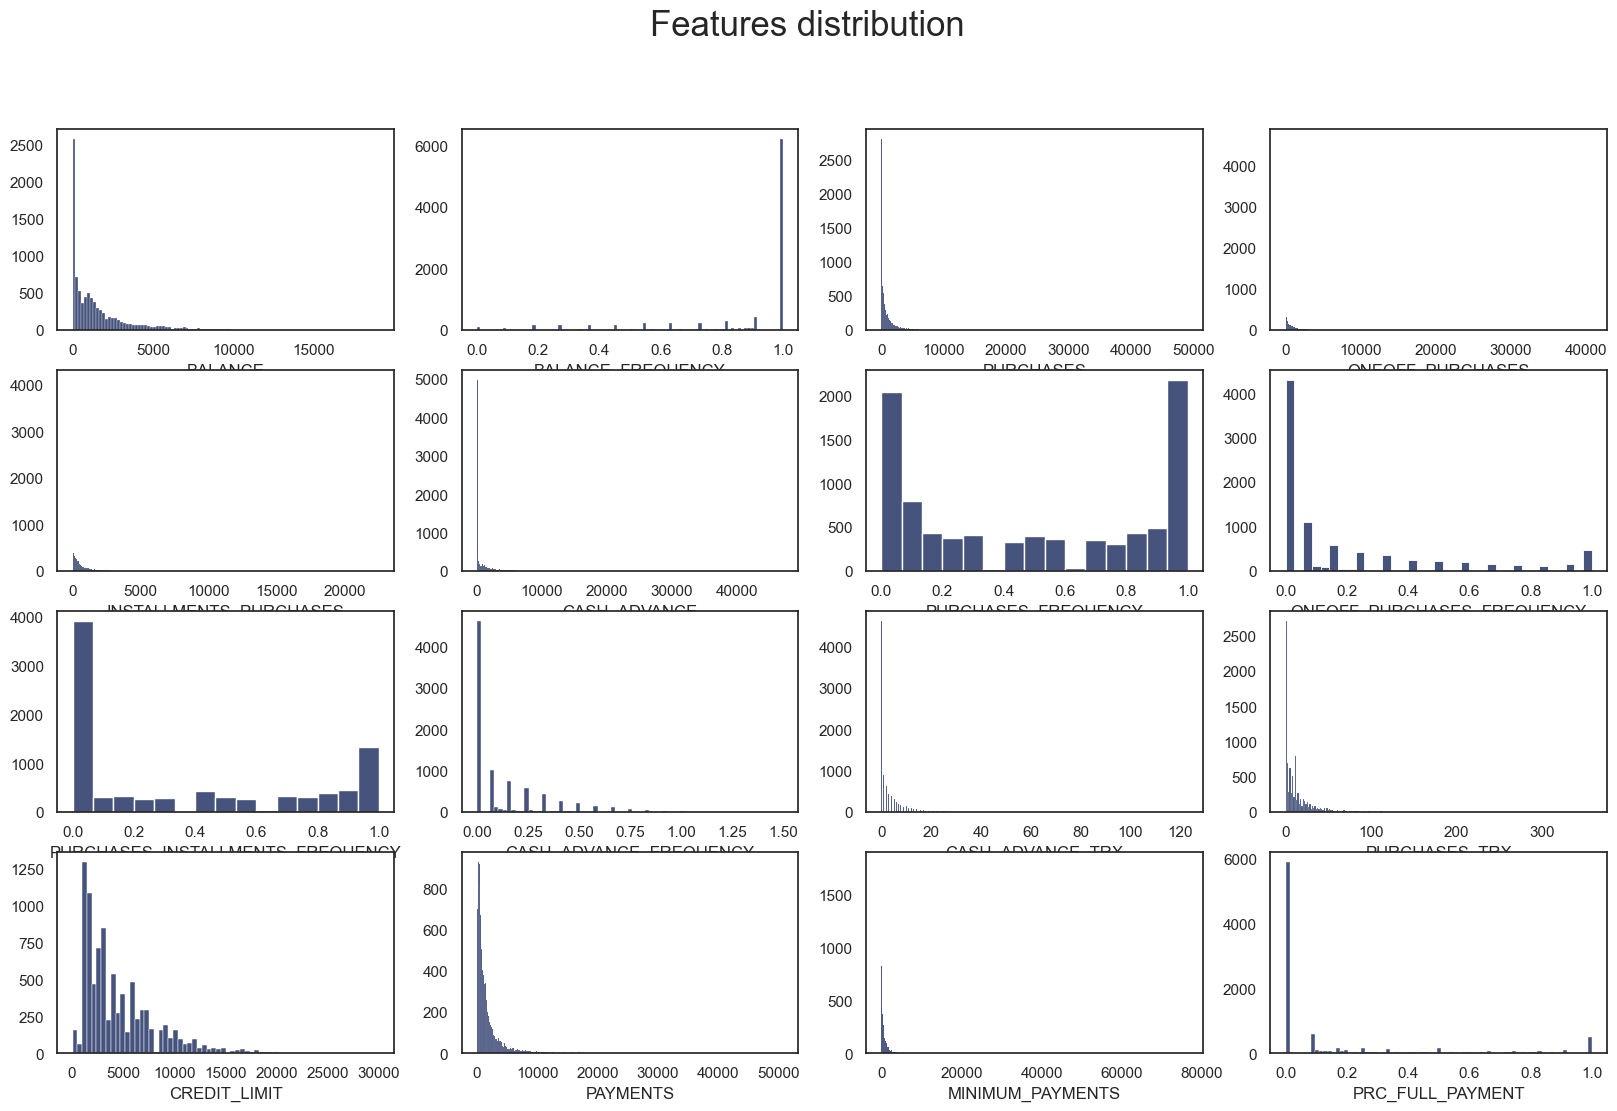

In [11]:
# Distribution plots
features = df.columns.tolist()[:-1]
fig, ax = plt.subplots(4,4, figsize=(20,12))
ax = ax.flatten()
plt.suptitle('Features distribution', fontsize=25)
i = 0
j = 0
for feature in features:
    sns.histplot(df[feature], color='#071A52', ax=ax[i])
    ax[i].set_ylabel(None)
    i += 1

plt.show()

**Insights**: Overall, the data is right skewed. How do we interprate that?
- It does not necessarily mean that there are a few outliers. It is very likely that we are dealing with some out of the common type of customers. 
- So, there might be a few customers who spend much more than the average people. They have a way higher balance, higher total purchase amount, higher credit limit, etc.

The question is... Do we get rid of those data points? Algorithms like K-Means do not do well on skewed data. 
- In my opinion, it comes down to the goals of our segmentation. We could spot those special customers with higher purchases and directly cluster them separately. Then, drop them from the data and proceed with the rest of it. However, I do not really like that option since there is  many features and not all of them are correlated. So we might end up with a big cluster of customers with no so many things in common. 
- So? We can apply some transformation to the data to reduce the skewness, like log, square root, box-cox, etc. 

Let's check the skewness of every feature:

In [12]:
# Skewness 
df.skew().sort_values(ascending=False)

MINIMUM_PAYMENTS                    13.622797
ONEOFF_PURCHASES                    10.045083
PURCHASES                            8.144269
INSTALLMENTS_PURCHASES               7.299120
PAYMENTS                             5.907620
CASH_ADVANCE_TRX                     5.721298
CASH_ADVANCE                         5.166609
PURCHASES_TRX                        4.630655
BALANCE                              2.393386
PRC_FULL_PAYMENT                     1.942820
CASH_ADVANCE_FREQUENCY               1.828686
ONEOFF_PURCHASES_FREQUENCY           1.535613
CREDIT_LIMIT                         1.522464
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
PURCHASES_FREQUENCY                  0.060164
BALANCE_FREQUENCY                   -2.023266
TENURE                              -2.943017
dtype: float64

### Log transformation
Let's apply the log transformation to the feature with high skewness: 

In [13]:
log_df = df.copy()
columns = df.drop(['PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_FREQUENCY'], axis=1).columns
for col in columns:
    log_df[col] = log_df[col].apply(np.log1p)

log_df.skew().sort_values(ascending=False)

PRC_FULL_PAYMENT                    1.746046
CASH_ADVANCE_FREQUENCY              1.455462
ONEOFF_PURCHASES_FREQUENCY          1.290617
CASH_ADVANCE_TRX                    0.940131
PURCHASES_INSTALLMENTS_FREQUENCY    0.509201
CASH_ADVANCE                        0.262594
MINIMUM_PAYMENTS                    0.249933
ONEOFF_PURCHASES                    0.185854
PURCHASES_FREQUENCY                 0.060164
PURCHASES_TRX                       0.032697
INSTALLMENTS_PURCHASES             -0.024981
CREDIT_LIMIT                       -0.101438
PURCHASES                          -0.764492
BALANCE                            -0.861021
PAYMENTS                           -1.778312
BALANCE_FREQUENCY                  -2.285534
TENURE                             -3.170222
dtype: float64

In general, now we have much lower skewness values. So, let's plot the distributions once again and check how they look like:

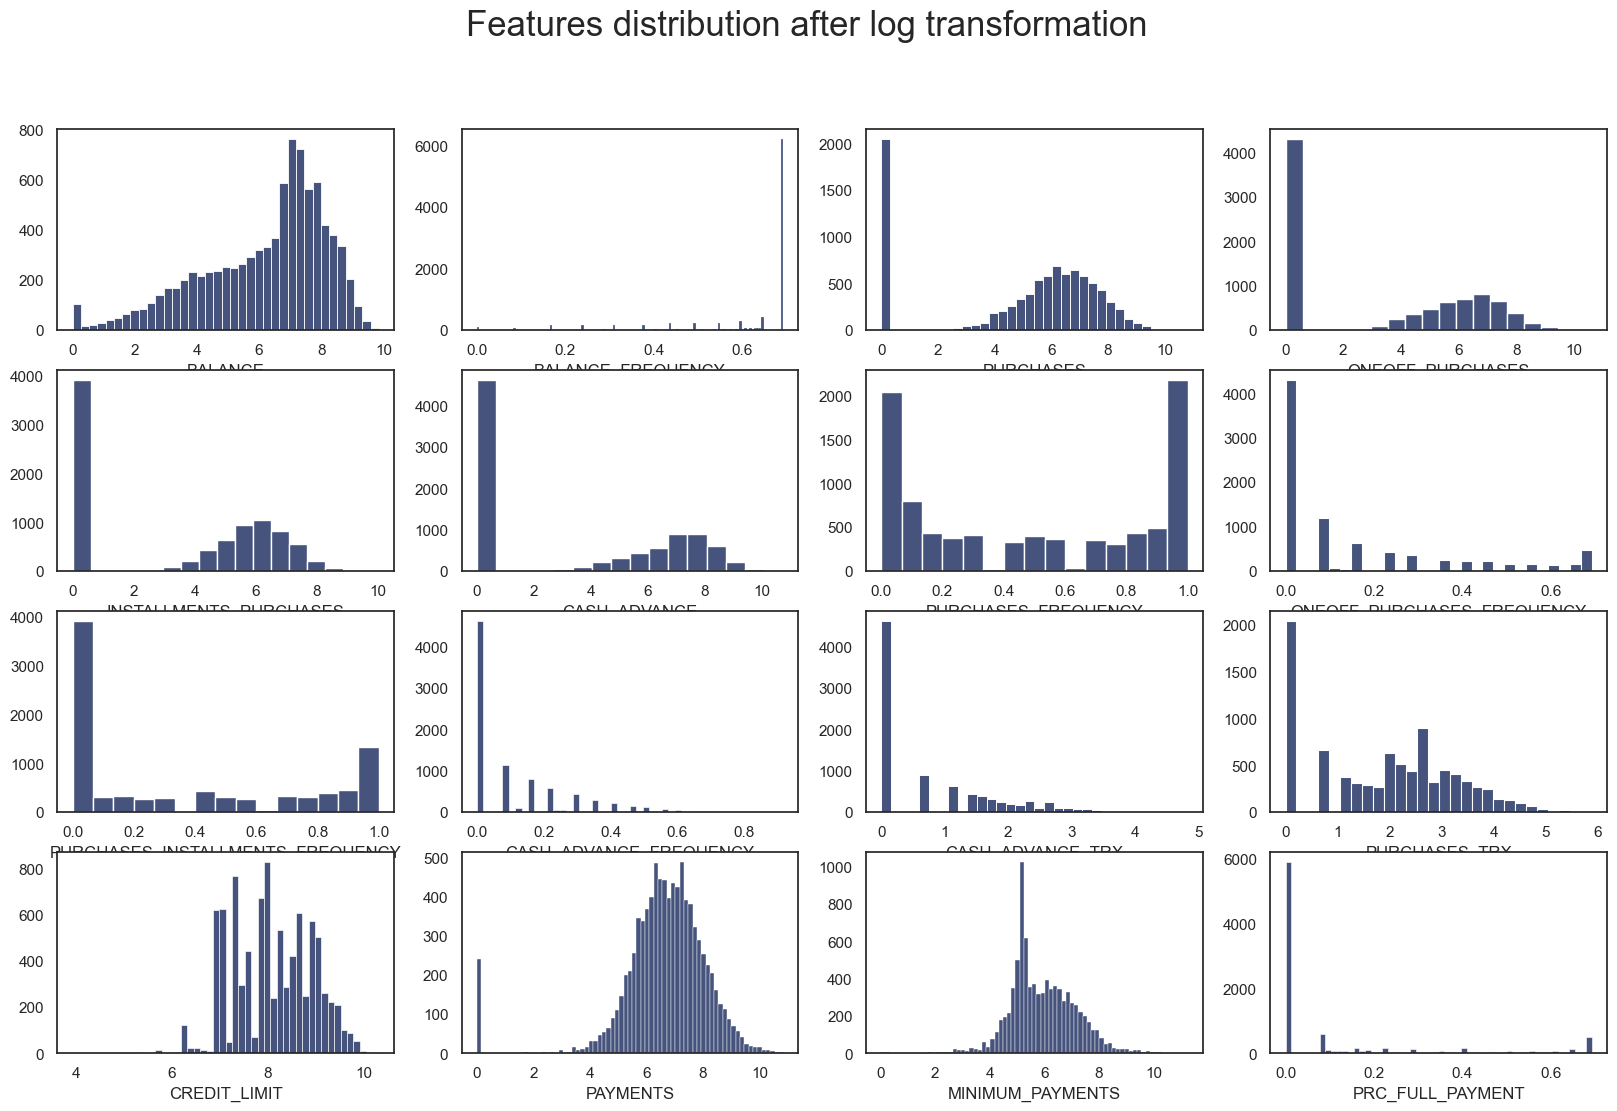

In [14]:
# Distribution plots
features = log_df.columns.tolist()[:-1]
fig, ax = plt.subplots(4,4, figsize=(20,12))
ax = ax.flatten()
plt.suptitle('Features distribution after log transformation', fontsize=25)
i = 0
j = 0
for feature in features:
    sns.histplot(log_df[feature], color='#071A52', ax=ax[i])
    ax[i].set_ylabel(None)
    i += 1

plt.show()

**Note:** The distributions look overall much better than before. They could be better, but it is good improvement. 


### Scaling data
Let's scale the data using StandardScaler. This is vital to train clustering algorithms as all features should be on the same scale. Otherwise features with bigger scale would be given more importance when segmentating. 

In [15]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(log_df), columns = df.columns)

### KNN Imputer
Now, let's impute the few missing values we had in the data using K Nearest Neighbors imputation:

In [16]:
knn = KNNImputer(n_neighbors=5)
log_df = pd.DataFrame(knn.fit_transform(df_scaled), index=df_scaled.index, columns=df_scaled.columns.tolist())
print('Missing values after KNN imputation: {}'.format(log_df.isna().sum().sum()))

Missing values after KNN imputation: 0


We are done with all the necessary data preprocessing and we can begin with clustering! 

# Clustering 

Now lets use some ML models to segmentate the customers into different clusters. The methods used are:
1. KMeans
## 1. KMeans 
Let's start by training some KMeans models changing the number of clusters and building up the elbow and silhouette score curves:

In [17]:
# Run KMeans with different number of clusters
inertia = []
silhouette = []
list_num_clusters = list(range(2, 16))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters, random_state=42)
    km.fit(log_df)
    inertia.append(km.inertia_)
    cluster_labels = km.fit_predict(log_df)
    silhouette_avg = silhouette_score(log_df, cluster_labels)
    silhouette.append(silhouette_avg)

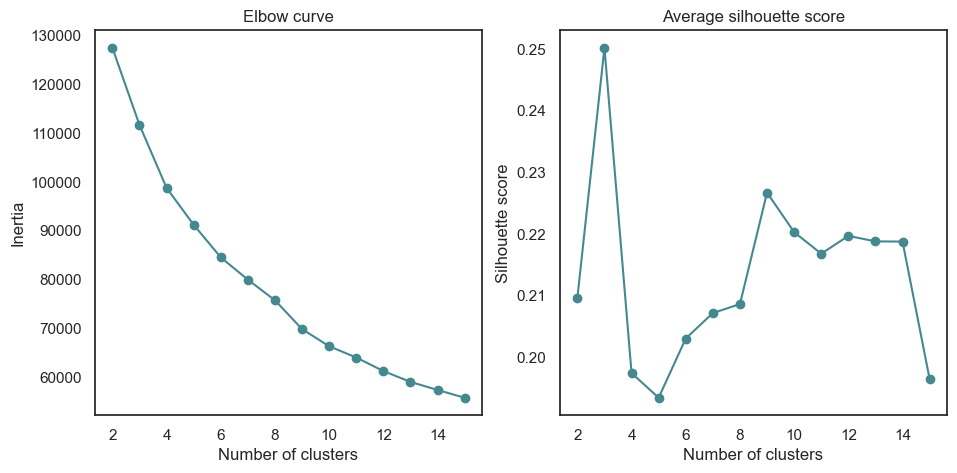

In [18]:
# Plot elbow and silhouette curves
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11, 5))
ax1.plot(list_num_clusters, inertia, marker='o', color='#458990')
ax2.plot(list_num_clusters, silhouette, marker='o', color='#458990')
ax1.set_title('Elbow curve')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia')
ax2.set_title('Average silhouette score')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette score')
plt.show()

**Insights:** the elbow curve looks a bit tricky. It seems to start flattening at *n=4, so that could be a possible number of clusters. On the other hand, the avg. silhouette score is higher for *n=3*. 

So, let's train the model again using `n_clusters = 3`. 


In [19]:
n = 3
km = KMeans(n_clusters=n, random_state=42)
km.fit(log_df)
# Create the cluster labels
cluster_labels = km.fit_predict(log_df)
# Add cluster labels to the original data
df['Cluster'] = km.fit_predict(log_df)
log_df['Cluster'] = cluster_labels

### PCA Analysis
Now we can reduce the dimensionality of the data and see how the clusters sparse in lower dimensions. Meaning that we want to see the clusters in a 2D or 3D plot.

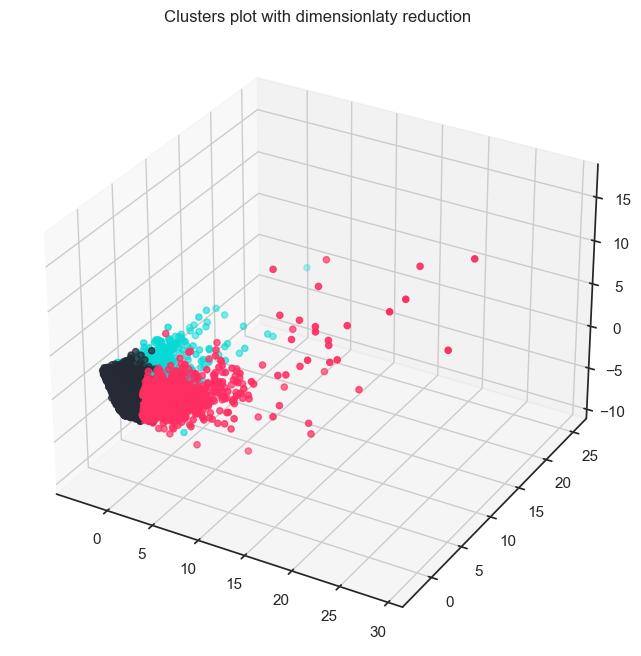

In [20]:
# Cluster colors
cluster_colors = ["#08D9D6", "#252A34", "#FF2E63"]

# PCA Analysis n_components=3 
pca = PCA(n_components=3)
pca_values = pca.fit_transform(log_df)
pca_3d_df = pd.DataFrame(pca_values, columns=(['Feature1', 'Feature2', 'Feature3']))
pca_3d_df['Cluster'] = km.labels_

# 3D plot
x =pca_3d_df["Feature1"]
y =pca_3d_df["Feature2"]
z =pca_3d_df["Feature3"]

fig = plt.figure(figsize=(10,8))
cmap = colors.ListedColormap(cluster_colors)

ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z,c=pca_3d_df['Cluster'], marker="o", cmap=cmap)
ax.set_title("Clusters plot with dimensionlaty reduction")
plt.show()

We see differentiable clusters in this lower dimension. The purple and blue colored clusters seem to be a bit more far apart to the others

### Profiling with KMeans and 3 clusters
Now, we should make sense of the segmentation and try to identify customer profile in each of the clusters. So, let's do that

### Clusters distribution

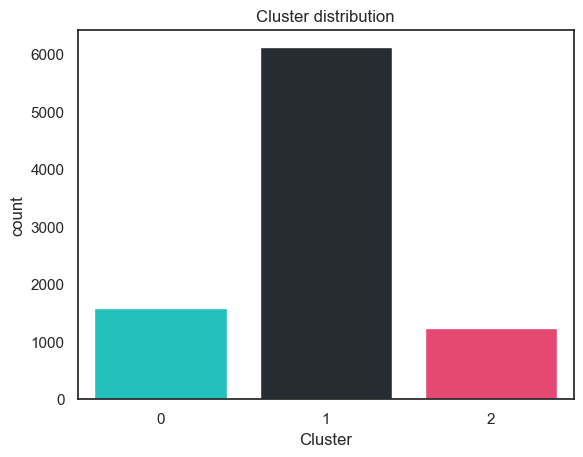

In [21]:
# Clusters distribution plot
sns.countplot(data=df, x='Cluster', palette=cluster_colors)
plt.title('Cluster distribution')
plt.show()

**Notes:** 
- Cluster 1 is much bigger than the others.
- Cluster 0 and 2 are about the same size.

### Cluster radar chart
Let's group the data by cluster label and check the mean values of each feature. Then, plot the results on a radar chart:

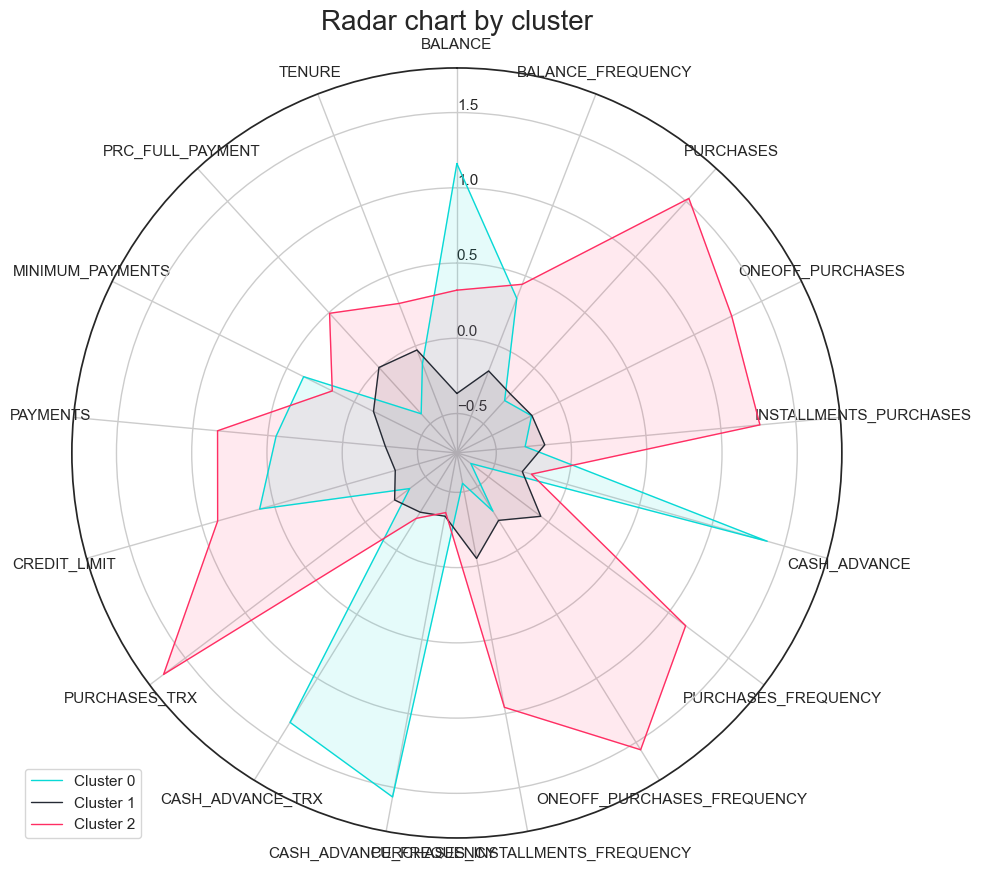

In [22]:
from math import pi

group = log_df.groupby("Cluster").mean()
# number of variable
categories=list(group)
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
 
# Cluster 1
values = log_df.groupby("Cluster").mean().loc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 0", color=cluster_colors[0])
ax.fill(angles, values, color=cluster_colors[0], alpha=0.1)
 
# Cluster 1
values = log_df.groupby("Cluster").mean().loc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 1", color=cluster_colors[1])
ax.fill(angles, values, color=cluster_colors[1], alpha=0.1)

# Cluster 3
values = log_df.groupby("Cluster").mean().loc[2].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 2", color=cluster_colors[2])
ax.fill(angles, values, color=cluster_colors[2], alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Radar chart by cluster', fontsize=20)

plt.show()

### Cluster profiles

**Cluster 0**

 I will call them **the spenders**:
 - These customers are by far the ones who spend the most, as the mean of *purchases* is way more bigger that the rest of the clusters. 
 - They not only spend more but also more often (check *purchases frequency and purchases trx*). 
 - Most of the purchases are one-off or one-time spendings. 
 - They mostly make the purchases on installments, almost no cash in advance. 
 - They also have a bigger credit limit and their percentage of full payments is the highest among all clusters. 

 **Cluster 1**

 I will call them **the average**:
 - These customers have much lower balance overall. 
 - They show a more restrained or moderate consumption, in accordance with their balance.
 - Their spendings are slightly higer on installments, but relativelty balanced with upfront payments.
 - They have a low credit limit.

**Cluster 2**
 
I will call them **the savers**:
- They have the biggest balance of all. However, these are the ones who spend the least money.
- They pay upfront, and barely in installments.
- They have the lowest purchase frequency.

One might think that the savers are mostly richer people since their mean balance is higher than the rest. However, the following plots show that is not the case:

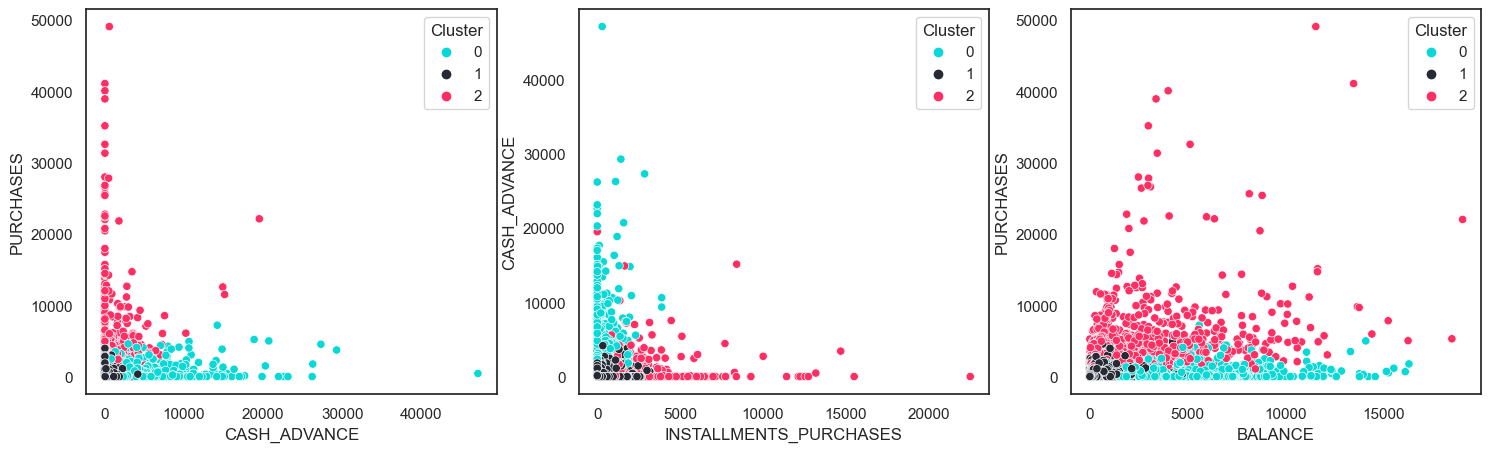

In [23]:
# Some scatter plots for further analysis.
fig, ax = plt.subplots(1, 3, figsize=(18,5))
sns.scatterplot(data=df, x='CASH_ADVANCE', y='PURCHASES', hue='Cluster', palette=cluster_colors, ax=ax[0])
sns.scatterplot(data=df, x='INSTALLMENTS_PURCHASES', y='CASH_ADVANCE', hue='Cluster', palette=cluster_colors, ax=ax[1])
sns.scatterplot(data=df, x='BALANCE', y='PURCHASES', hue='Cluster', palette=cluster_colors, ax=ax[2])

plt.show()

 **Insight**: Cluster 0 also have customers with high balance, some even higher than customers from cluster 2. So, what is the takeaway here? Cluster 2 tend to have higher balance because they spend less money, simple and plain. That's why I named them **the savers**. 

### Conclusion
- We applied KMeans clustering to perform customer segmentation. We identified three cluster and performed customer profiling. 
- The customer were classified as spenders, average, and savers. I think the segmentation makes sense, altough there might be other solutions to this challenge.
- The marketing deparment can create different strategies for these three customers categories 🙂